In [121]:
#libraries
from os import listdir, path
from lxml import etree

#empty vectors
dates = []
namesfrom = []
mailto = []
body = []

#retrieving each file in folder and fillinf vector with data from xml
mypath = 'emails/'
files = [path.join(mypath, f) for f in listdir(mypath) if f.endswith('.xml')]
for file in files:
    doc = etree.parse(file)
    for elem in doc.findall('message'):
        dates.append((elem.find("received/date").text))
        namesfrom.append((elem.find("from/name").text))
        mailto.append((elem.find("to/email").text))    
        body.append((elem.find("text").text))   
 

In [122]:
#converting all vectors into a dataframe
import pandas as pd
dict = {'dates': dates, 'namesfrom': namesfrom, 'mailto': mailto, 'body': body} 
df = pd.DataFrame(dict)

In [138]:
#find in the body of emails a string, the return of the function is a dataframe
search = search_df(df,'proud')

In [ ]:
#frequencies of the field "mailto", related to the parties
search.groupby(['mailto']).size()

[Text(0, 0, 'connod'),
 Text(1, 0, 'conservativeemail'),
 Text(2, 0, 'greennod'),
 Text(3, 0, 'greenparty'),
 Text(4, 0, 'liberal'),
 Text(5, 0, 'liberalnod'),
 Text(6, 0, 'ndp.ca'),
 Text(7, 0, 'ndpnod.ca')]

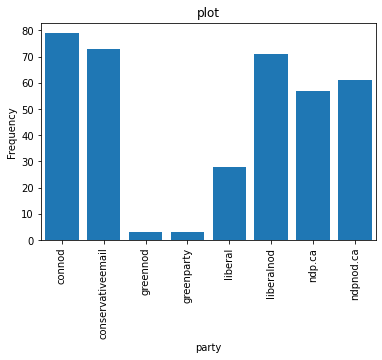

In [137]:
#libraries to plot
import matplotlib.pyplot as plt
import numpy as np

#generating frequencies, labels and plot
frequencies = np.arange(8)
freq_series = pd.Series(frequencies)
x_labels = [
    'connod',
    'conservativeemail',
    'greennod',
    'greenparty',
    'liberal',
    'liberalnod',
    'ndp.ca',
    'ndpnod.ca',
]
plt.bar(x, search.groupby(['mailto']).size())
ax = freq_series.plot(kind="bar")
ax.set_title("plot")
ax.set_xlabel("party")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

In [125]:
#function to search text in the body of the email
def search_df(dataf,strin):
    nf = df[df['body'].str.contains(strin)]
    return(nf)